In [226]:
import pandas as pd
from matplotlib import pyplot as plt
import numpy as np
import seaborn as sns
from tqdm import tqdm
from skbio.diversity import beta_diversity
from skbio.stats.ordination import pcoa
from scipy.spatial.distance import braycurtis
import plotly_express as px
from pyvis.network import Network

In [227]:
data_d = pd.read_csv(r"C:\Users\tomer\Desktop\year3\sem B\workshop_microbiome\train_data.csv", index_col="sample")
meta_d = pd.read_csv(r"C:\Users\tomer\Desktop\year3\sem B\workshop_microbiome\train_metadata.csv",  index_col="sample")

## graph 1

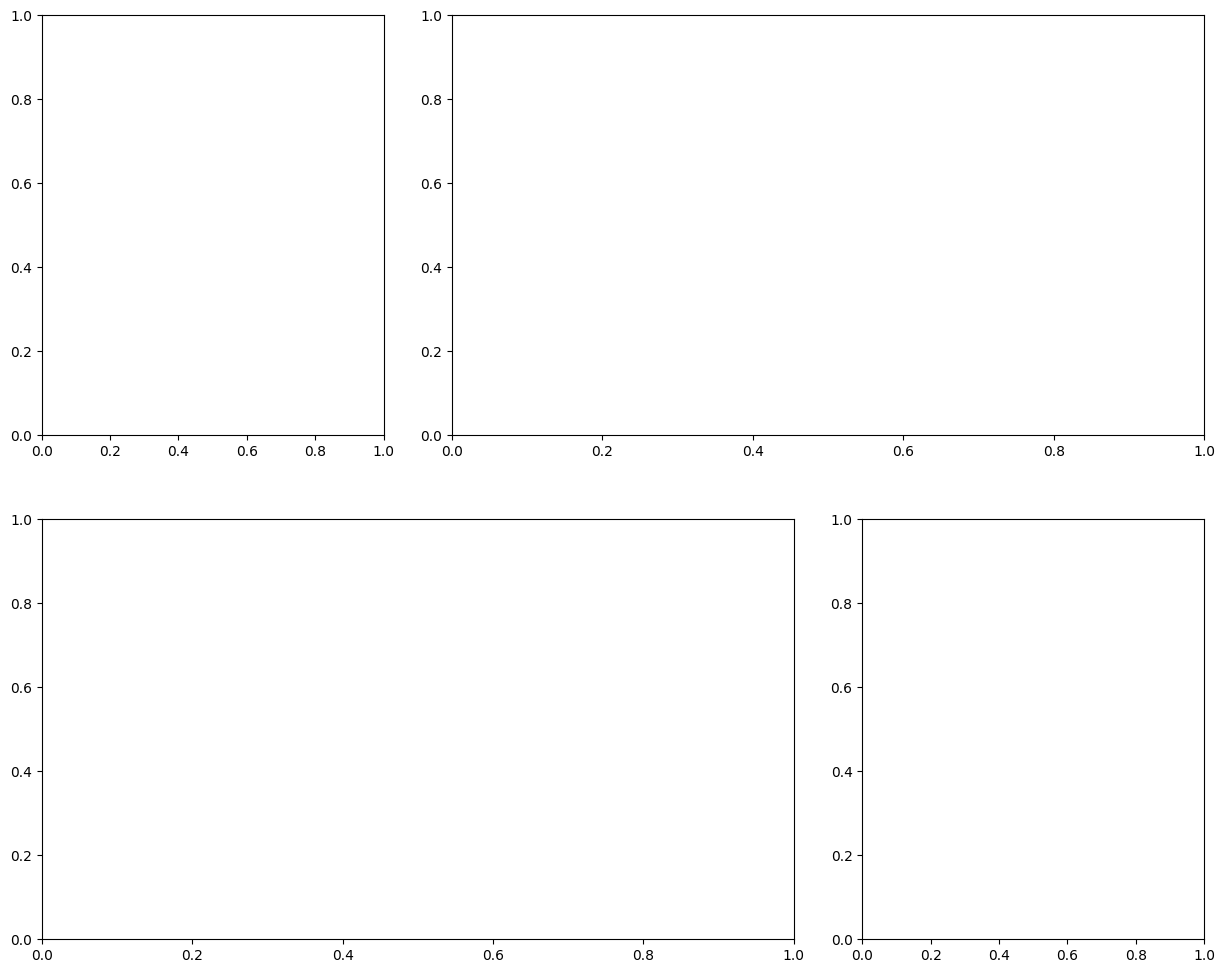

In [228]:
fig,axes = plt.subplot_mosaic([['a', 'b' ,'b'],
                               ['c', 'c', 'd']])
fig.set_size_inches(15, 12)

In [229]:
# sample perbaboon histogram
data_df = data_d.copy()
metadata_df =meta_d.copy()

baboons = metadata_df.groupby("baboon_id").count()["collection_date"]
sns.histplot(baboons, binwidth=10, binrange=(40, 130), ax=axes['a'])
axes['a'].set_xlabel("Number of Samples")
axes['a'].set_ylabel("Number of Baboons")
axes['a'].set_title("Number of Samples per Baboon - Train Data")
axes['a'].text(-0.1, 1.05, 'A', transform=axes['a'].transAxes,
               fontsize=14, fontweight='bold', va='top', ha='right')


Text(-0.1, 1.05, 'A')

In [230]:
# time difference histogram
data_df = data_d.copy()
metadata_df =meta_d.copy()
metadata_df["collection_date"] = (pd.to_datetime(metadata_df['collection_date']) - pd.Timestamp('1970-01-01')).dt.days
metadata_df.sort_values(by=["baboon_id", "collection_date"], inplace=True)
ds = []
for baboon in metadata_df["baboon_id"].unique():
    curr = metadata_df[metadata_df["baboon_id"] == baboon]["collection_date"].values
   
    for i in range(len(curr)-1):
        ds.append(curr[i+1]-curr[i])
        
ds = np.array(ds)


In [231]:
sns.histplot(ds, ax=axes['b'])
for i in range(365//2, max(ds), 365//2):
    axes['b'].vlines(x=i, ymin=0, ymax=1000, color="black")


axes['b'].set_xlabel("Time Difference (Days)")
axes['b'].set_yscale("log")
axes['b'].set_title("Time Difference Between Consecutive Samples")
axes['c'].text(0, 1.05, 'B', transform=axes['b'].transAxes,
               fontsize=14, fontweight='bold', va='top', ha='right')


Text(0, 1.05, 'B')

In [232]:
### Month of collection piechart
data_df = data_d.copy()
metadata_df =meta_d.copy()
month_cnt = metadata_df.groupby("month").count().values[:,0]
palette_color = sns.color_palette("Spectral", 12)

axes['c'].pie(month_cnt/ np.sum(month_cnt), labels=range(1,13), autopct='%.0f%%', colors=palette_color)
axes['c'].text(0, 1.05, 'C', transform=axes['c'].transAxes,
               fontsize=14, fontweight='bold', va='top', ha='right')
axes['c'].set_title("Month of Collection Distribution")

Text(0.5, 1.0, 'Month of Collection Distribution')

In [233]:
### Male vs Female piechart
data_df = data_d.copy()
metadata_df =meta_d.copy()

sex_cnt = np.array(metadata_df[["month", "sex"]].groupby("sex").count()).reshape(-1)

axes['d'].pie(sex_cnt/ np.sum(sex_cnt), labels=["F", "M"], autopct='%.0f%%')
axes['d'].text(0, 1.05, 'D', transform=axes['d'].transAxes,
               fontsize=14, fontweight='bold', va='top', ha='right')
axes['d'].set_title("Male - Female Distribution")


Text(0.5, 1.0, 'Male - Female Distribution')

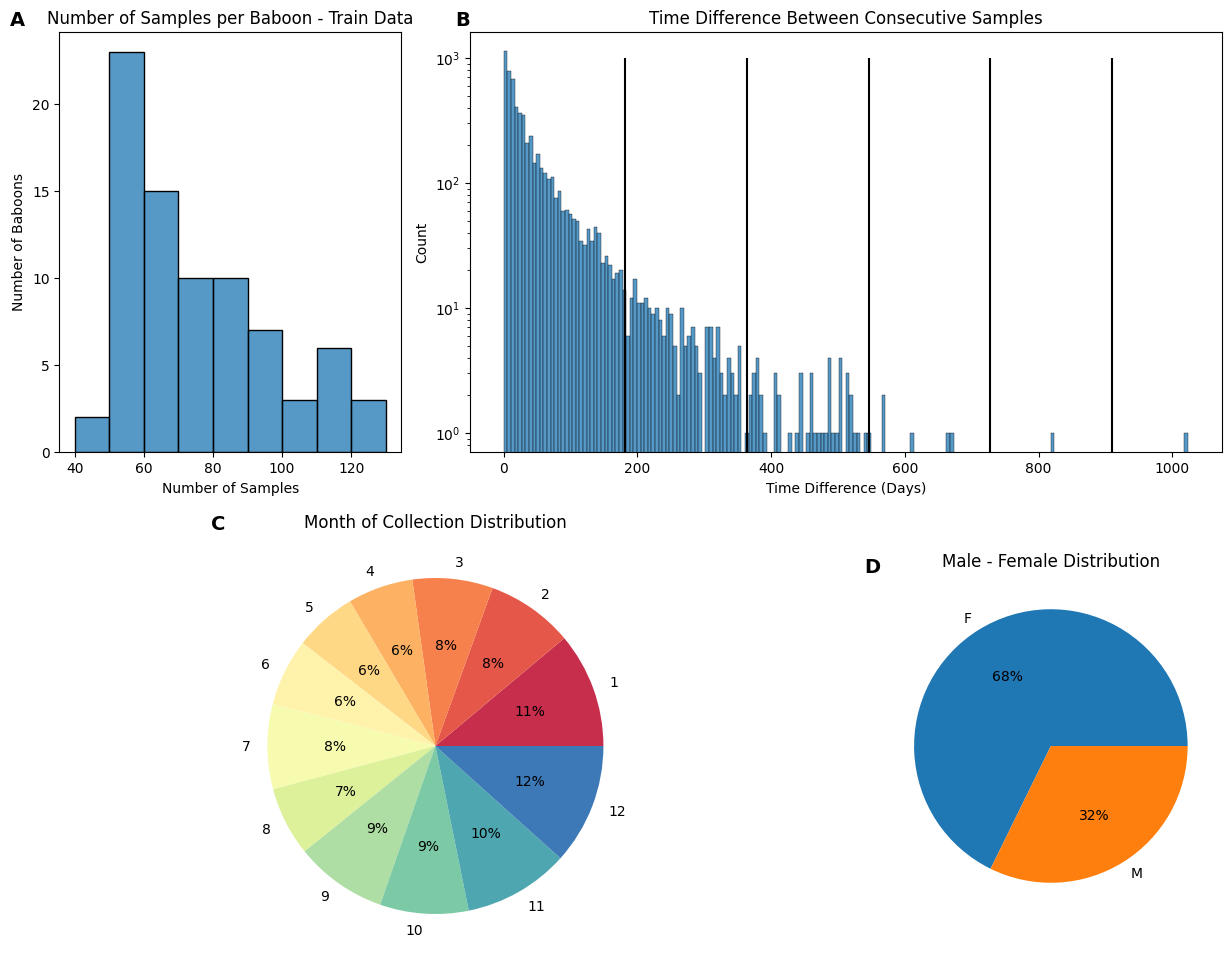

In [234]:
fig